In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data_paramter = { # learnable params. +1555
    'STGCN': [0.30734, 0.308895],
    'GWNet': [0.303344, 0.304899],
    'AGCRN': [0.907848, 0.909403],
    'LSTM': [0.097932, 0.099487],
    'STAE': [1.372260, 1.373815],
    'D2STGNN': [0.396916, 0.398471]
}

data_time = {
    'STGCN': [506.684727668762, 619.599154949188],
    'GWNet': [2451.77108454704, 2484.27499628067],
    'AGCRN': [1104.32851314544, 1170.00182461738],
    'LSTM': [361.489282131195, 467.749671459198],
    'STAE': [812.9367891, 822.1670234],
    'D2STGNN': [1036.055484, 1036.734739]
}

data_MAE = {
    'STGCN': [2.0426, 1.9918],
    'GWNet': [2.0399,2.0187],
    'AGCRN': [2.0168, 1.9972],
    'LSTM': [2.3897, 2.364]
}

cname = {
    'lightblue':            '#ADD8E6',
    'lightcoral':           '#F08080',
    'lightcyan':            '#E0FFFF',
    'lightgoldenrodyellow': '#FAFAD2',
    'lightgreen':           '#90EE90',
    'lightgray':            '#D3D3D3',
    'lightpink':            '#FFB6C1',
    'lightsalmon':          '#FFA07A',
    'lightseagreen':        '#20B2AA',
    'lightskyblue':         '#87CEFA',
    'lightslategray':       '#778899',
    'lightsteelblue':       '#B0C4DE',
    'lightyellow':          '#FFFFE0'
}

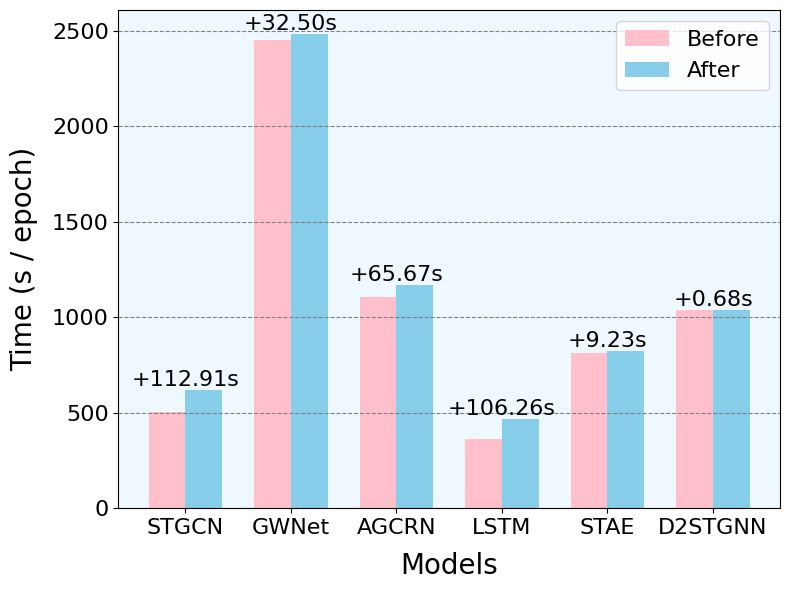

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data_time = {
    'STGCN': [506.684727668762, 619.599154949188],
    'GWNet': [2451.77108454704, 2484.27499628067],
    'AGCRN': [1104.32851314544, 1170.00182461738],
    'LSTM': [361.489282131195, 467.749671459198],
    'STAE': [812.9367891, 822.1670234],
    'D2STGNN': [1036.055484, 1036.734739]
}
methods = list(data_time.keys())
before_values = np.array([item[0] for item in data_time.values()])
after_values = np.array([item[1] for item in data_time.values()])

bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.8)
bar1 = ax.bar(index, before_values, bar_width, label='Before', color='pink')
bar2 = ax.bar(index + bar_width, after_values, bar_width, label='After', color='skyblue')

ax.set_xlabel('Models', fontsize=20, labelpad=10)
ax.set_ylabel('Time (s / epoch)', fontsize=20, labelpad=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods, fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='y', labelsize=16)


# 设置柱状图内部背景色
ax.set_facecolor('aliceblue')

# 添加文字描述
for i in range(len(methods)):
    increase_time = after_values[i] - before_values[i]
    ax.text(index[i] + bar_width / 2, max(before_values[i], after_values[i]) + 0,
            f'+{increase_time:.2f}s', ha='center', va='bottom', fontsize=16)

plt.tight_layout()  # 调整布局，确保内容不超出
plt.savefig(f'time_compare.pdf', dpi=800, bbox_inches='tight')

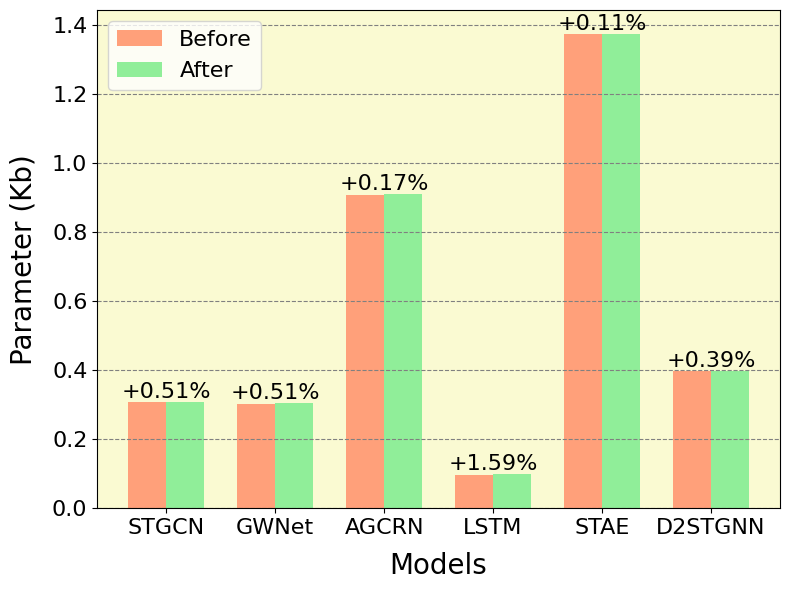

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data_paramter = { # learnable params. +1555
    'STGCN': [0.30734, 0.308895],
    'GWNet': [0.303344, 0.304899],
    'AGCRN': [0.907848, 0.909403],
    'LSTM': [0.097932, 0.099487],
    'STAE': [1.372260, 1.373815],
    'D2STGNN': [0.396916, 0.398471]
}

# data_paramter = {
#     'STGCN': [0.30734* 1024, 0.308895* 1024],
#     'GWNet': [0.303344* 1024, 0.304899* 1024],
#     'AGCRN': [0.907848* 1024, 0.909403* 1024],
#     'LSTM': [0.097932* 1024, 0.099487* 1024],
#     'STAE': [1.372260* 1024, 1.469800* 1024],
#     'D2STGNN': [0.396916* 1024, 0.411363* 1024]
# }


methods = list(data_paramter.keys())
before_values = np.array([item[0] for item in data_paramter.values()])
after_values = np.array([item[1] for item in data_paramter.values()])

bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.8)
bar1 = ax.bar(index, before_values, bar_width, label='Before', color='lightsalmon')
bar2 = ax.bar(index + bar_width, after_values, bar_width, label='After', color='#90EE99')

ax.set_xlabel('Models', fontsize=20, labelpad=10)
ax.set_ylabel('Parameter (Kb)', fontsize=20, labelpad=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods, fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(axis='y', labelsize=16)


# 设置柱状图内部背景色
ax.set_facecolor('lightgoldenrodyellow')

# 添加文字描述
for i in range(len(methods)):
    increase_percentage = ((after_values[i] - before_values[i]) / before_values[i]) * 100
    ax.text(index[i] + bar_width / 2, max(before_values[i], after_values[i]) + 0,
            f'+{increase_percentage:.2f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()  # 调整布局，确保内容不超出
plt.savefig(f'parm_compare.pdf', dpi=800, bbox_inches='tight')



In [10]:
import numpy as np
import matplotlib.pyplot as plt
pems04 = np.load('../data/pems04/2018/his.npz')
data = pems04['data']
print(data.shape)
print(data)


FileNotFoundError: [Errno 2] No such file or directory: '../data/pems04/2018/his.npz'

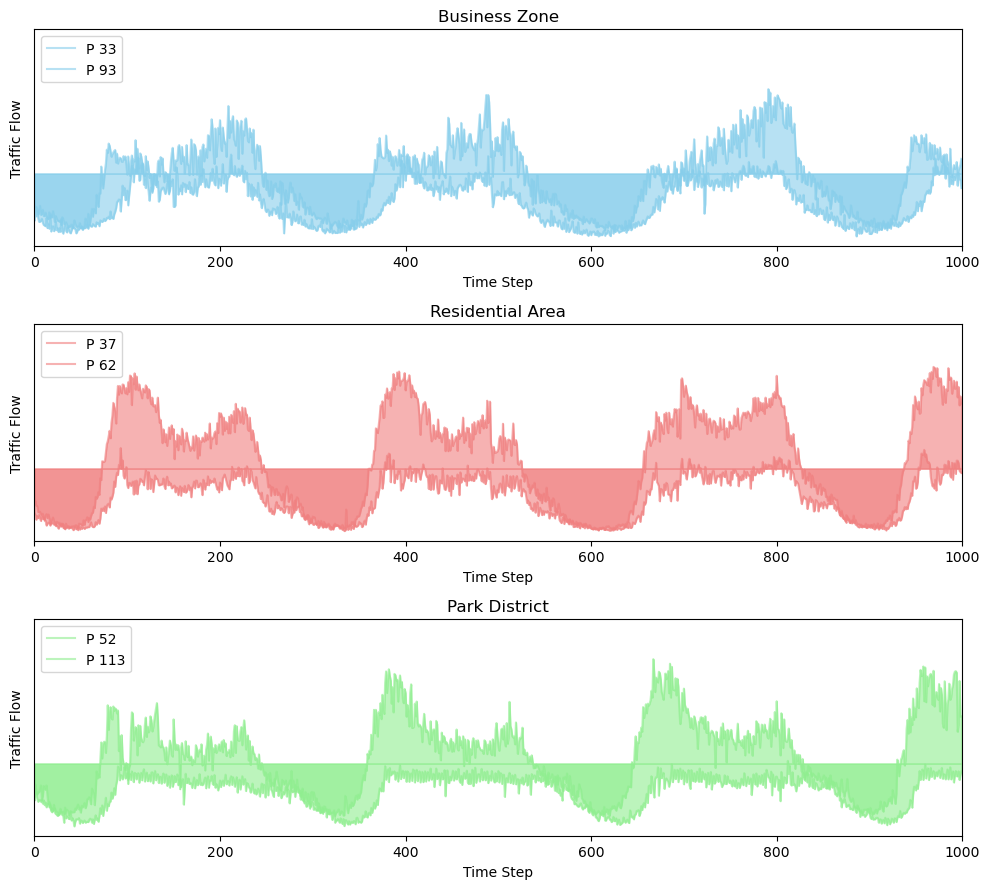

In [8]:
# 93, 33 -> Business Zone
# 37, 62 -> Residential Area
# 52, 113 -> Park area

point1, point2 = np.random.choice(307, 2, replace=False) # 选择两个随机点

# 绘制三张山脊图
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# 设置颜色和透明度
color = ['skyblue','lightcoral','lightgreen']
ylabels = ['Business Zone','Residential Area','Park District']
points = [33, 93, 37, 62, 52, 113]
alpha = 0.6

for i, ax in enumerate(axs):
    # 提取第 i 个特征的数据
    point1, point2 = points[i*2], points[i*2+1] #np.random.choice(307, 2, replace=False)
    feature_data = data[2000:3000, [point1, point2], 0]

    # 绘制山脊图
    ax.plot(feature_data[:, 0], label=f'P {point1}', color=color[i], alpha=alpha)
    ax.plot(feature_data[:, 1], label=f'P {point2}', color=color[i], alpha=alpha)

    # 填充下方区域
    ax.fill_between(range(len(feature_data)), feature_data[:, 0], color=color[i], alpha=alpha)
    ax.fill_between(range(len(feature_data)), feature_data[:, 1], color=color[i], alpha=alpha)

    ax.set_title(ylabels[i])
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Traffic Flow')
    ax.set_xlim(0, len(feature_data))
    ax.legend(loc='upper left')

for ax in axs:
    ax.set_yticks([])
    ax.set_ylim(-1.5, 3)

plt.tight_layout()
plt.savefig(f'ridge_map.pdf', dpi=800, bbox_inches='tight')
plt.show()

In [9]:
'''
# 地图可以用kepler.gl/folium 来画
# 创建以洛杉矶为中心的地图
import folium
from IPython.display import display
from selenium import webdriver
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
# 添加标记点

folium.Marker([34.0522, -118.2437], popup='Los Angeles').add_to(m)
folium.Marker([34.0901, -118.3617], popup='West Hollywood').add_to(m)
folium.Marker([34.1006, -118.3209], popup='Beverly Hills').add_to(m)
folium.Marker([34.1425, -118.2551], popup='Glendale').add_to(m)
folium.Marker([34.1808, -118.3090], popup='Burbank').add_to(m)
folium.Marker([34.0736, -118.4004], popup='Santa Monica').add_to(m)
folium.Marker([33.9416, -118.4085], popup='Culver City').add_to(m)
folium.Marker([34.2812, -118.4388], popup='La Cañada Flintridge').add_to(m)

# 添加高速公路标注
folium.PolyLine(locations=[[34.2267, -118.5384], [34.0736, -118.4004], [33.9416, -118.4085]], 
                color='red', weight=2.5, opacity=1, popup='I-405').add_to(m)
folium.PolyLine(locations=[[34.0810, -118.2437], [34.1425, -118.2551]], 
                color='blue', weight=2.5, opacity=1, popup='SR-2').add_to(m)
folium.PolyLine(locations=[[34.1425, -118.2551], [34.1808, -118.3090]], 
                color='green', weight=2.5, opacity=1, popup='I-5').add_to(m)

# 在Notebook中显示地图
display(m)
m.save('la.html')

# 使用selenium打开HTML文件并截图
driver = webdriver.Chrome()  # 确保已经安装了ChromeDriver
driver.get('file:///path/to/la.html')
driver.maximize_window()  # 最大化窗口以获得更高的分辨率
driver.save_screenshot('map.png')
driver.quit()
'''

"\n# 地图可以用kepler.gl/folium 来画\n# 创建以洛杉矶为中心的地图\nimport folium\nfrom IPython.display import display\nfrom selenium import webdriver\nm = folium.Map(location=[34.0522, -118.2437], zoom_start=10)\n# 添加标记点\n\nfolium.Marker([34.0522, -118.2437], popup='Los Angeles').add_to(m)\nfolium.Marker([34.0901, -118.3617], popup='West Hollywood').add_to(m)\nfolium.Marker([34.1006, -118.3209], popup='Beverly Hills').add_to(m)\nfolium.Marker([34.1425, -118.2551], popup='Glendale').add_to(m)\nfolium.Marker([34.1808, -118.3090], popup='Burbank').add_to(m)\nfolium.Marker([34.0736, -118.4004], popup='Santa Monica').add_to(m)\nfolium.Marker([33.9416, -118.4085], popup='Culver City').add_to(m)\nfolium.Marker([34.2812, -118.4388], popup='La Cañada Flintridge').add_to(m)\n\n# 添加高速公路标注\nfolium.PolyLine(locations=[[34.2267, -118.5384], [34.0736, -118.4004], [33.9416, -118.4085]], \n                color='red', weight=2.5, opacity=1, popup='I-405').add_to(m)\nfolium.PolyLine(locations=[[34.0810, -118.2437], [34.142

# 画T-SNE图

In [18]:
import numpy as np
import pandas as pd

def cal_pairwise_dist(x):
    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^w + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    return dist
 
 
def cal_perplexity(dist, idx=0, beta=1.0):
    '''计算perplexity, D是距离向量，
    idx指dist中自己与自己距离的位置，beta是高斯分布参数
    这里的perp仅计算了熵，方便计算
    '''
    prob = np.exp(-dist * beta)
    # 设置自身prob为0
    prob[idx] = 0
    sum_prob = np.sum(prob)
    perp = np.log(sum_prob) + beta * np.sum(dist * prob) / sum_prob
    prob /= sum_prob
    return perp, prob
 
 
def seach_prob(x, tol=1e-5, perplexity=30.0):
    '''二分搜索寻找beta,并计算pairwise的prob
    '''
 
    # 初始化参数
    print("Computing pairwise distances...")
    (n, d) = x.shape
    dist = cal_pairwise_dist(x)
    pair_prob = np.zeros((n, n))
    beta = np.ones((n, 1))
    # 取log，方便后续计算
    base_perp = np.log(perplexity)
 
    for i in range(n):
        if i % 500 == 0:
            print("Computing pair_prob for point %s of %s ..." %(i,n))
 
        betamin = -np.inf
        betamax = np.inf
        perp, this_prob = cal_perplexity(dist[i], i, beta[i])
 
        # 二分搜索,寻找最佳sigma下的prob
        perp_diff = perp - base_perp
        tries = 0
        while np.abs(perp_diff) > tol and tries < 50:
            if perp_diff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2
                else:
                    beta[i] = (beta[i] + betamax) / 2
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2
                else:
                    beta[i] = (beta[i] + betamin) / 2
 
            # 更新perb,prob值
            perp, this_prob = cal_perplexity(dist[i], i, beta[i])
            perp_diff = perp - base_perp
            tries = tries + 1
        # 记录prob值
        pair_prob[i,] = this_prob
    print("Mean value of sigma: ", np.mean(np.sqrt(1 / beta)))
    return pair_prob
 
 
def pca(x, no_dims = 50):
    ''' PCA算法
    使用PCA先进行预降维
    '''
    print("Preprocessing the data using PCA...")
    (n, d) = x.shape
    x = x - np.tile(np.mean(x, 0), (n, 1))
    l, M = np.linalg.eig(np.dot(x.T, x))
    y = np.dot(x, M[:,0:no_dims])
    return y
 
 
def tsne(x, no_dims=2, initial_dims=50, perplexity=30.0, max_iter=1000):
    """Runs t-SNE on the dataset in the NxD array x
    to reduce its dimensionality to no_dims dimensions.
    The syntaxis of the function is Y = tsne.tsne(x, no_dims, perplexity),
    where x is an NxD NumPy array.
    """
 
    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array x should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1
 
    # 初始化参数和变量
    x = pca(x, initial_dims).real
    (n, d) = x.shape
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    y = np.random.randn(n, no_dims)
    dy = np.zeros((n, no_dims))
    iy = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))
 
    # 对称化
    P = seach_prob(x, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    # early exaggeration
    P = P * 4
    P = np.maximum(P, 1e-12)
 
    # Run iterations
    for iter in range(max_iter):
        # Compute pairwise affinities
        sum_y = np.sum(np.square(y), 1)
        num = 1 / (1 + np.add(np.add(-2 * np.dot(y, y.T), sum_y).T, sum_y))
        num[range(n), range(n)] = 0
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)
 
        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dy[i,:] = np.sum(np.tile(PQ[:,i] * num[:,i], (no_dims, 1)).T * (y[i,:] - y), 0)
 
        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dy > 0) != (iy > 0)) + (gains * 0.8) * ((dy > 0) == (iy > 0))
        gains[gains < min_gain] = min_gain
        iy = momentum * iy - eta * (gains * dy)
        y = y + iy
        y = y - np.tile(np.mean(y, 0), (n, 1))
        # Compute current value of cost function
        if (iter + 1) % 100 == 0:
            if iter > 100:
                C = np.sum(P * np.log(P / Q))
            else:
                C = np.sum( P/4 * np.log( P/4 / Q))
            print("Iteration ", (iter + 1), ": error is ", C)
        # Stop lying about P-values
        if iter == 100:
            P = P / 4
    print("finished training!")
    return y

In [48]:
import numpy as np
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

filename = ['pred_epoch_0.pt','pred_epoch_10.pt','pred_epoch_20.pt','pred_epoch_30.pt']
predictions = [None] * 4
flattened_predictions = [None] * 4
colors = [None] * 4
tsne = [None] * 4
tsne_results = [None] * 4
titles = ['Epoch 0','Epoch 10','Epoch 20','Epoch 30']

In [49]:
for i in range(4):
    predictions[i] = torch.load('../save/'+filename[i], map_location=torch.device('cpu')).detach().numpy()
    predictions[i] = predictions[i][:2,:,:,:]
    print(predictions[i].shape)
    B, T, N, _ = predictions[i].shape
    # 将预测结果重塑为 [B * T * N, 1]
    flattened_predictions[i] = predictions[i].reshape(B * T * N, 1)
    # 应用t-SNE将预测结果映射到二维空间
    tsne[i] = TSNE(n_components=2, random_state=42)
    tsne_results[i] = tsne[i].fit_transform(flattened_predictions[i])
    # 创建颜色映射
    colors[i] = np.arange(B * T * N)

(2, 12, 307, 1)


d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2, 12, 307, 1)


d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2, 12, 307, 1)


d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2, 12, 307, 1)


d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Env\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


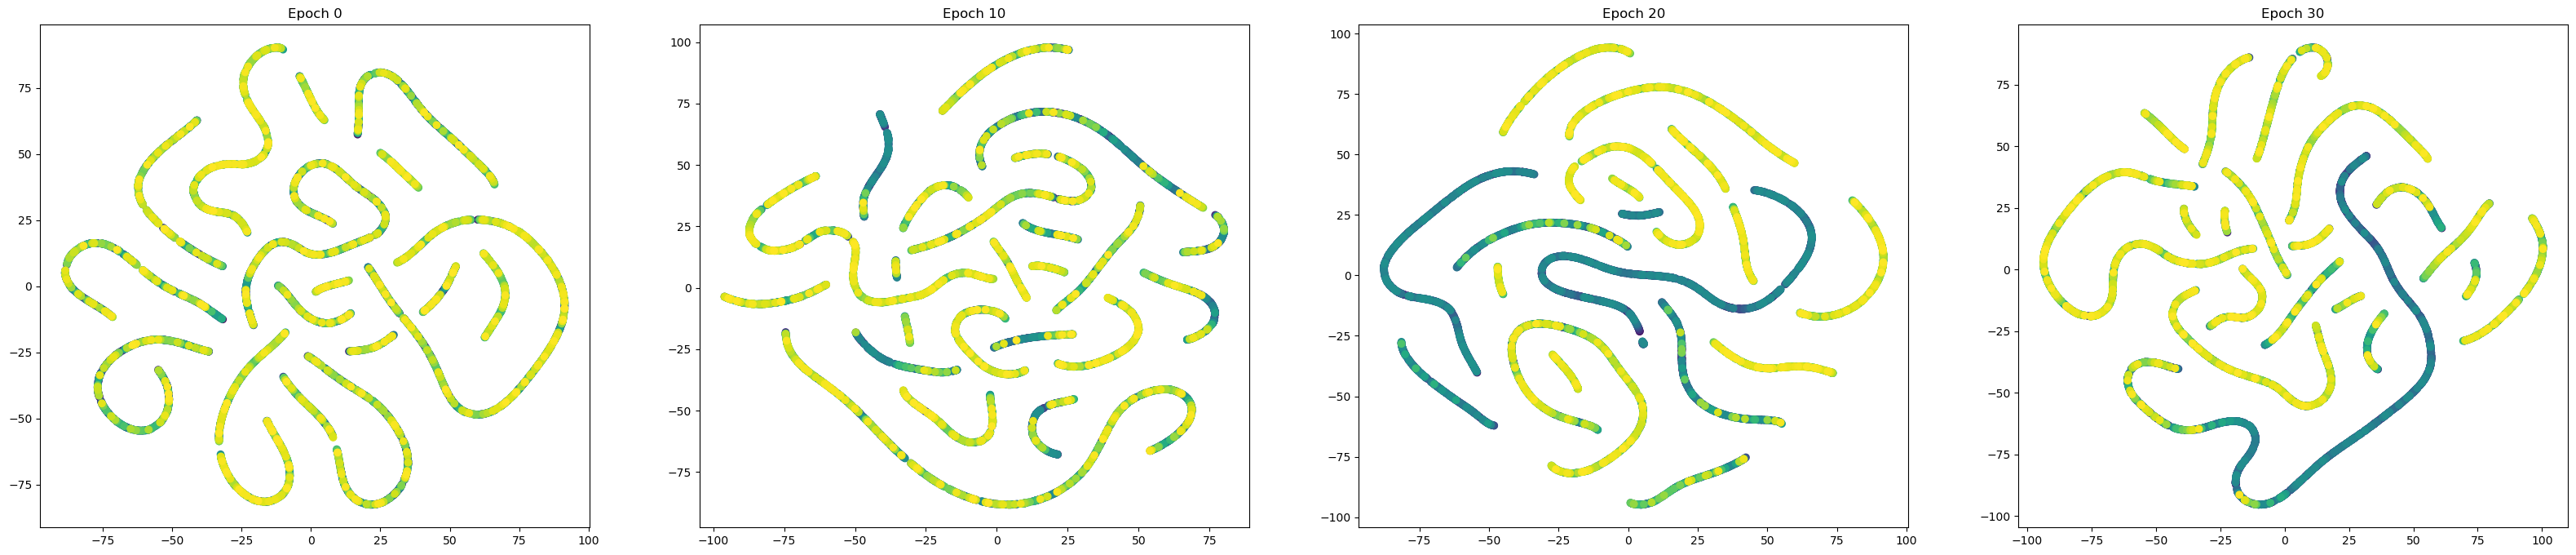

In [50]:
# 可视化t-SNE结果
fig, axs = plt.subplots(1, 4, figsize=(40, 8))  # 创建1行7列的子图

for i in range(4):
    # 对每个子图进行绘制
    axs[i].scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], c=colors[i], cmap='viridis')
    axs[i].set_title(titles[i])

plt.show()
#plt.colorbar(label='Data Point Index')
# plt.figure(figsize=(8, 8))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, cmap='viridis')
# 
# #plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('t-SNE Visualization of Time-Space Predictions')
# plt.show()